In [53]:
#Part 14-A
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
digits = load_digits()

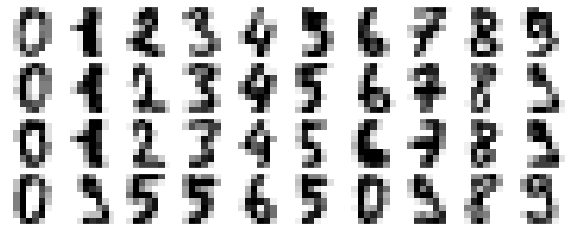

In [54]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

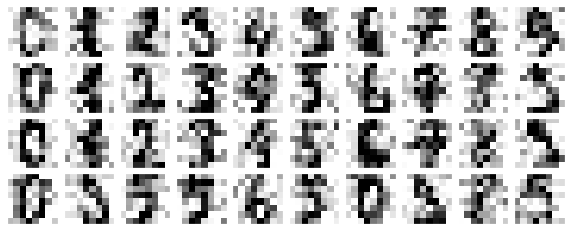

In [55]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [56]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

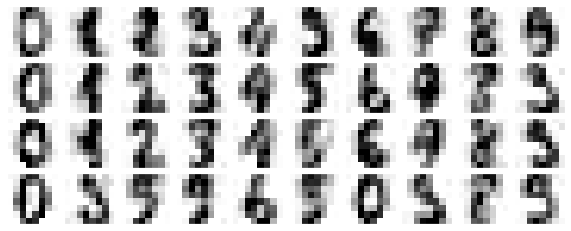

In [57]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [58]:
pca2 = PCA(0.30).fit(noisy)
pca2.n_components_

5

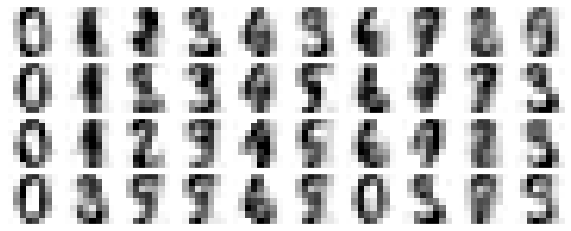

In [59]:
components2 = pca2.transform(noisy)
filtered2 = pca2.inverse_transform(components2)
plot_digits(filtered2)

In [60]:
pca3 = PCA(0.70).fit(noisy)
pca3.n_components_

26

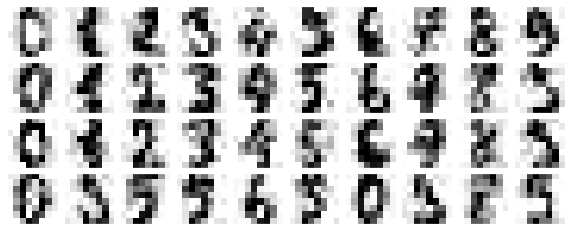

In [61]:
components3 = pca3.transform(noisy)
filtered3 = pca3.inverse_transform(components3)
plot_digits(filtered3)

In [62]:
#Task-14B:
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

digits = load_digits()

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

0.9432387312186978

In [63]:
digits = load_digits()
pca = PCA(n_components=2)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_pca)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

0.5943238731218697

In [64]:
from sklearn.manifold import Isomap
digits = load_digits()
iso = Isomap(n_components=2)
X_iso = iso.fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_iso)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

0.6822481914301614

In [65]:
#Task-14C

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)

In [66]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

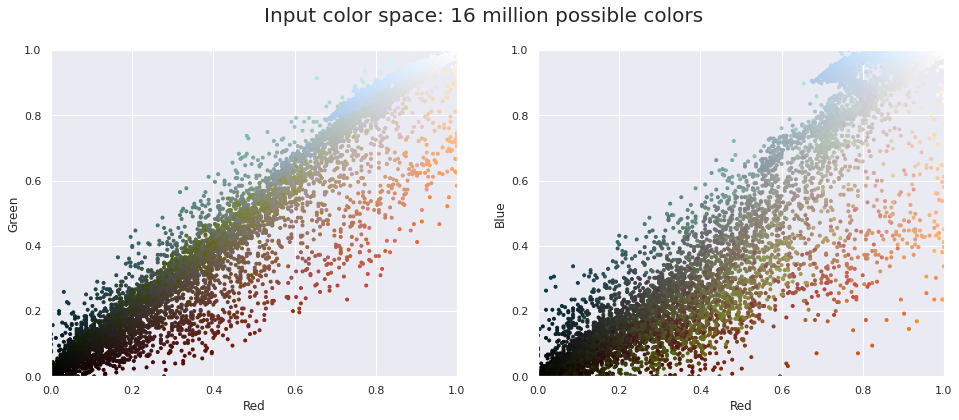

In [67]:
plot_pixels(data, title='Input color space: 16 million possible colors')

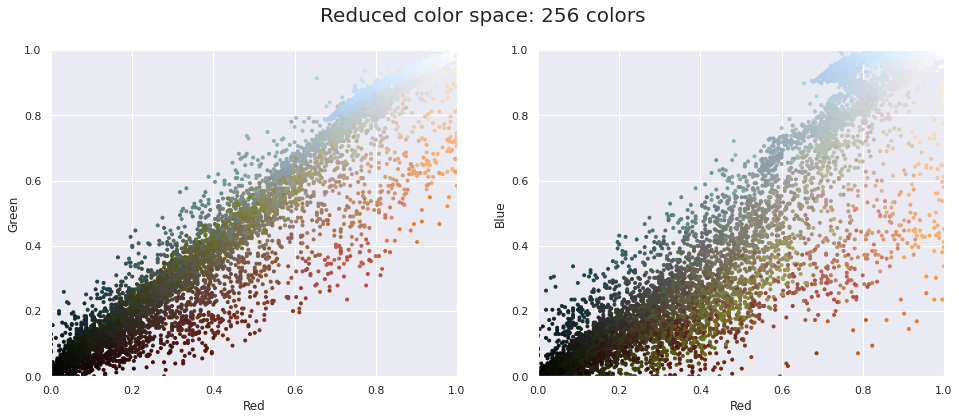

In [72]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(256)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 256 colors")

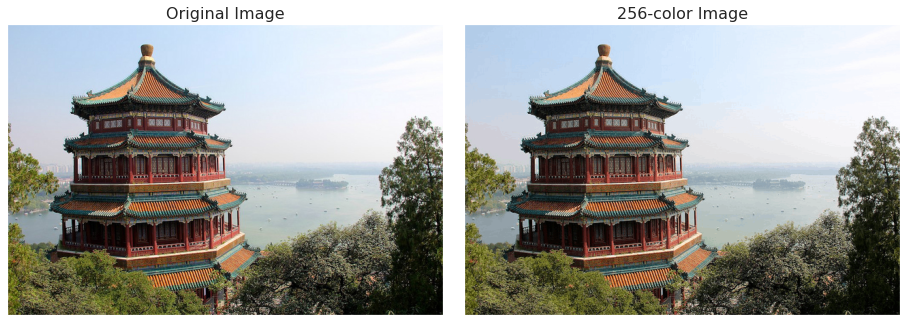

In [73]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('256-color Image', size=16);